# Task 4

First, update the following cell to have a link to your Homework 1 GitHub repository:

UPDATE THIS LINK:

https://github.com/carmengg/eds-220-hwk-1

In this task, make at least 5 commits at moments you think are adequate. We'll look at your repo to check commit history. Err on the side of commenting too much for now to get in the habit.

Add comments for all your code. Err on the side of commenting too much for now.

Comments in each exercise and commits will count towards your grade.

This task covers topics we will see on Wednesday Oct. 11. You might want to wait until after that class to solve it.

## Acknowledgement
This task was adapted from the *Pandas Fundamentals with Earthquake Data* assignment from the e-book [Earth and Environmental Data Science](https://earth-env-data-science.github.io/intro.html)

## About the data

For this task we are going to use simplified data from the [USGS Earthquakes Database](https://earthquake.usgs.gov/earthquakes/search/). This dataset is in tabular format and has the following columns:

- time = date and time of event (all events from 2014)
- latitude = decimal degrees [-90,90]
- longitude = decimal degrees [-360,360]
- depth = depth of the event (km)
- mag =  magnitude of event
- id = event identifier
- place = where the event took place
- type = type of event

## 1 

a. Import pandas (always with standard abbreviation!).

b. Use `pd.read_csv()` to import the `earthquake_data.csv` dataset and store it as `raw_eqk` (variable name).

c. Look at the head of the dataframe.

In [1]:
# solve exercise here

#import pandas
import pandas as pd

#import earthquake data
raw_eqk = pd.read_csv("data/earthquake_data.csv")

#look at first few colunns
raw_eqk.head()

,time,latitude,longitude,depth,mag,id,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ak11155107,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,nn00436847,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ak11151142,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ak11151135,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ci37171541,"10km WNW of Progreso, Mexico",earthquake


## 2
a. Print the shape of the `raw_eqk` dataframe.

b. Print the type of `raw_eqk`'s shape.

c. Print *only* the number of rows by accessing it from `raw_eqk`'s shape. HINT: how do you index an element in a tuple?

In [2]:
# solve exercise here

#a.
#output is the number of rows followed by columns
raw_eqk.shape

#b.
#output of type is a 'tuple' based on the shape of the dataframe
type(raw_eqk.shape)

#c.
#first index [0] of the dataframes shape is the number of rows
print(raw_eqk.shape[0])


120108


## 3

Get the unique values of the type of events.

In [3]:
# solve exercise here

#by selecting the `type` column first the unqique function will return all the unique values in that column
raw_eqk['type'].unique()

array(['earthquake', 'quarry blast', 'quarry', 'mining explosion',
       'rock burst', 'explosion', 'landslide', 'sonicboom', 'sonic boom',
       'anthropogenic event', 'acoustic noise'], dtype=object)

# 4

a. Select only earthquake events and store them as `eqk` (variable name)

b. Update the index of `eqk` to be the `id` column of the dataframe. 

c. Check the new index by viewing the first 3 rows of `eqk`.

In [4]:
# solve exercise here

#a
#find where type is earthquake in that type column
eqk = raw_eqk[raw_eqk['type'] == 'earthquake']

#b
#setting index to id column
eqk_update = eqk.set_index('id')
eqk_update

#c
#only first three rows of updated column
eqk_update.head(3)


,time,latitude,longitude,depth,mag,place,type
id,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.2520,-152.7081,90.2,1.10,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.0703,-115.1309,0.0,1.33,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.6717,-149.2528,7.1,1.30,"12km NNW of North Nenana, Alaska",earthquake


# 5

How many events were left out of `raw_eqk` when you selected ony earthqake events? 

HINT: There are *many* ways you can get this information. One could be to use (2).

In [5]:
# solve exercise here

#finding the count of rows of updated eqk column
eqk_events = eqk_update.shape[0]
eqk_events

#subtracting the number of rows from the raw data and the updated eqk data to find the left out data by the zero index; (rows, columns).
left_out = raw_eqk.shape[0] - eqk_update.shape[0]
left_out

1710

# 6
Without creating any new variables, plot a histogram of the eartquake's magnitudes (`eqk` data). Add a title and change the color of your graph.

<AxesSubplot:title={'center':'Earthquake Magnitude Frequencies'}, ylabel='Frequency'>

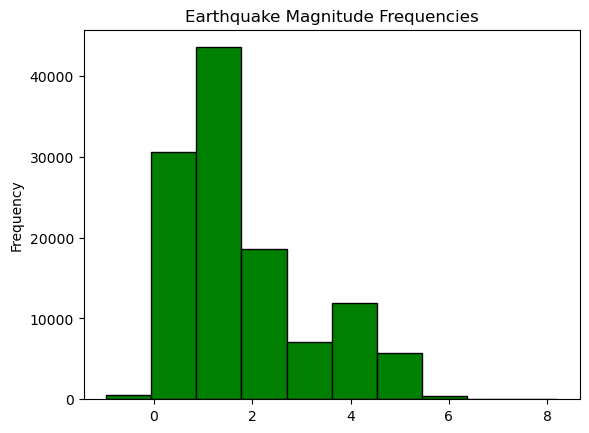

In [21]:
# solve exercise here

#selecting the mag data from eqk_update dataframe
eqk_update['mag'].plot(kind='hist', #select histogram
                       color='green', #change color
                       edgecolor='black', #change outline color
                      title = 'Earthquake Magnitude Frequencies') #add title


# 7

a. Create a new variable `top20` with the 20 earthquakes with largest magnitude. HINT: [`pandas.Series.nlargest`](https://pandas.pydata.org/docs/reference/api/pandas.Series.nlargest.html)

b. Create a bar plot showing the magnitude of the top 20 earthquakes. Update the title, x-axis label, y-axis label, and color of the bars. 

c. What is the role of the `top20` index in the graph? What would have happened if we had not updated the index?

<AxesSubplot:title={'center':'Top 20 Magnitude Earthquakes'}, xlabel='Latitude', ylabel='Magnitude'>

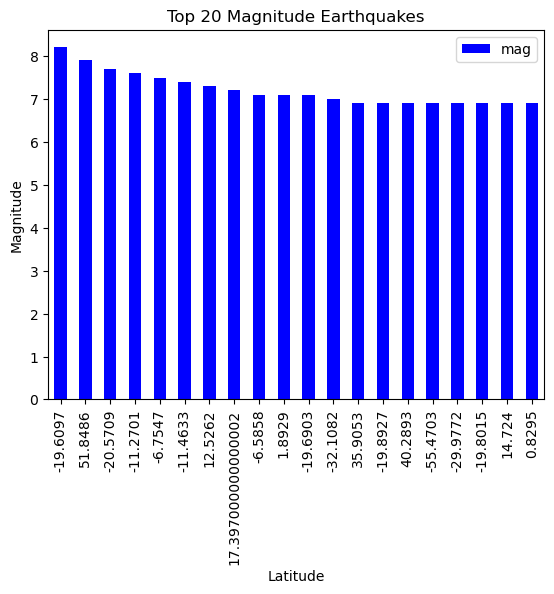

In [25]:
# solve exercise here

#a 
#
top20 = eqk_update.nlargest(20, 'mag')

#b
#
top20.plot(kind = 'bar',
           title = 'Top 20 Magnitude Earthquakes', #title
           x = 'latitude',
           y = 'mag',
           xlabel = 'Latitude', #x label
           ylabel = 'Magnitude', #y label
           color = 'blue') #color to blue


*Write your answer for 7c here*

# 8 
We are interested in place, magnitude and depth of the top 20 earthquakes with largest magnitude. Select this data from the `eqk` data frame.

HINT: This is a "select rows and columns simultaneously" from `eqk` exercise. To select the rows you could use the index of `top20`.

In [8]:
# solve exercise here

# 9 

Without creating any new variables, visualize the locations of eartquakes with magnitude greter than 5 by creating a scatter plot of their latitude and longitude. Make the following adjustments to the basic plot:
- update the title
- color the points by magnitude (HINT: [check the `c` parameter here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html))
- adjust the `alpha` (transparency) argument
- adjust the `colormap` argument to maket it look prettier. [Click for ideas of sequential colormaps.](https://matplotlib.org/stable/users/explain/colors/colormaps.html)


In [9]:
# solve exercise here